# Machine Learning

Random Forest Accuracy: 0.8205861329521087
KNN Accuracy: 0.7583988563259471
SVM Accuracy: 0.7676912080057183
MLP Accuracy: 0.8077197998570408
XGBoost Accuracy: 0.8091493924231594

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       948
           1       0.78      0.62      0.69       451

    accuracy                           0.82      1399
   macro avg       0.81      0.77      0.78      1399
weighted avg       0.82      0.82      0.81      1399


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       948
           1       0.69      0.45      0.54       451

    accuracy                           0.76      1399
   macro avg       0.73      0.68      0.69      1399
weighted avg       0.75      0.76      0.74      1399


SVM Classification Report:
              precision    recall  f1-score   support

           0      

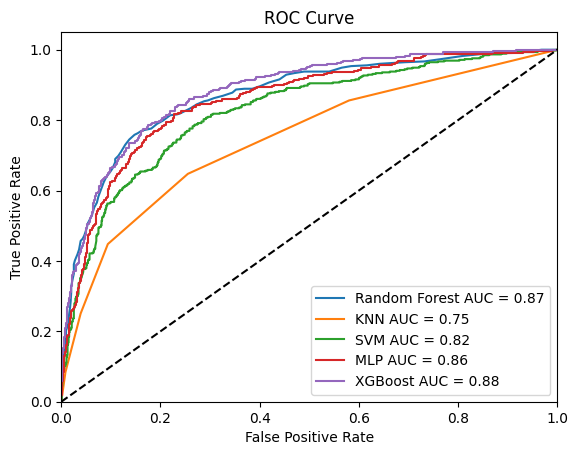

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Load data
df = pd.read_csv('final_selected_features_with_y_label.csv')
y = df['if_aki']
X = df.drop(columns=['if_aki'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)
mlp_model = MLPClassifier(random_state=42, max_iter=300)
xgb_model = xgb_model = XGBClassifier(
    n_estimators=200,       
    max_depth=6,            
    learning_rate=0.05,     
    min_child_weight=3,     
    gamma=0.1,              
    subsample=0.8,          
    colsample_bytree=0.8,   
    reg_alpha=0.01,         
    reg_lambda=1,           
    scale_pos_weight=3,     
    objective='binary:logistic',
    random_state=42
)

# Train models
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Print accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("MLP Accuracy:", accuracy_score(y_test, mlp_predictions))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))

# Print classification reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_predictions))
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("\nMLP Classification Report:")
print(classification_report(y_test, mlp_predictions))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

# Calculate AUC for each model
models = {
    'Random Forest': rf_model,
    'KNN': knn_model,
    'SVM': svm_model,
    'MLP': mlp_model,
    'XGBoost': xgb_model
}
plt.figure()

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:  # For models without predict_proba, like SVM without probability=True
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} AUC = {roc_auc:.2f}')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
